In [30]:
import pandas as pd

#loading data
path_cat_vector = './data/CategoryVectors.txt'
path_n_response_1 = './data/NeuralResponses_S1.txt'

#cat_label = pd.read_csv(path_cat_label)
cat_vector = pd.read_csv(path_cat_vector)
n_response_1 = pd.read_csv(path_n_response_1)

cat_dict = {"Var1" : "animate",
"Var2": "inanim",
"Var3": "human",
"Var4": "nonhumani",
"Var5":"body",
"Var6" :"face",
"Var7": "natObj",
"Var8": "artiObj",
"Var9" :"rand24",
"Var10" :"rand48",
"Var11": "other48",
"Var12": "monkeyape",}


#creating cat. var dataframe
cat_vector = cat_vector.rename(columns=cat_dict)     

In [23]:
cat_vector

,animate,inanim,human,nonhumani,body,face,natObj,artiObj,rand24,rand48,other48,monkeyape
0,1,0,1,0,1,0,0,0,0,0,1,0
1,1,0,1,0,1,0,0,0,1,0,1,0
2,1,0,1,0,1,0,0,0,0,0,1,0
3,1,0,1,0,1,0,0,0,0,1,0,0
4,1,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
83,0,1,0,0,0,0,0,1,0,1,0,0
84,0,1,0,0,0,0,0,1,1,1,0,0
85,0,1,0,0,0,0,0,1,0,0,1,0
86,0,1,0,0,0,0,0,1,1,0,1,0


### General statistics of responses by stimulus 

### (CONFIRM SEM CALCULATION IS CORRECT!!!)

In [80]:
from math import sqrt

#calculate everage value for every voxel
n_response_1['avg'] = n_response_1.mean(axis=1)

#response_animate= n_response_1.iloc[:44]
#response_inanimate = n_response_1.iloc[44:]

def is_animate(stimulus_index):
    if cat_vector['animate'][stimulus_index] == 1:
        return True
    else:
        return False

    
animate_indices = [is_animate(index)==True for index in range(len(n_response_1))]
inanimate_indices = [is_animate(index)==False for index in range(len(n_response_1))]

avg_responses_animate = n_response_1[animate_indices]['avg']
avg_responses_inanimate = n_response_1[inanimate_indices]['avg']

#get mean of average responses
mean_response_animate = avg_responses_animate.mean()
mean_response_inanimate = avg_responses_inanimate.mean()

#get SEM of average responses, SEM = Std / sqrt(sample size)
sem_response_animate = avg_responses_animate.std()/sqrt(len(avg_responses_animate))
sem_response_inanimate = avg_responses_inanimate.std()/sqrt(len(avg_responses_inanimate))

means_errors = pd.DataFrame({'condition':["animate response", "inanimate response"],
                        'mean': [mean_response_animate, mean_response_inanimate], 
                        'SEM': [sem_response_animate, sem_response_inanimate]})
print(means_errors)

            condition      mean       SEM
0    animate response  0.031966  0.043014
1  inanimate response -0.055558  0.035790


Text(0, 0.5, 'Mean average response strength')

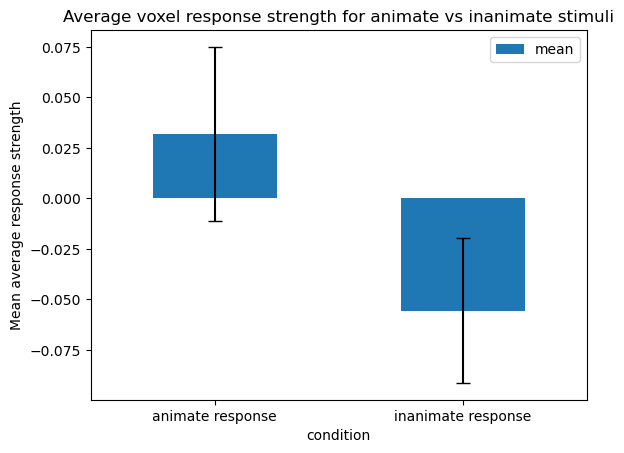

In [81]:
ax = means_errors.plot.bar(x='condition', y='mean', yerr='SEM', rot=0, capsize=5)
ax.set_title("Average voxel response strength for animate vs inanimate stimuli")
ax.set_ylabel("Mean average response strength")

### animate vs. inanimate stimuli, avg response t-test

### (CONFIRM DF = 43 is correct!)

In [132]:
#reset indexes
reset_response_animate = avg_responses_animate.reset_index(drop=True)
reset_response_inanimate = avg_responses_inanimate.reset_index(drop=True)

#subtract voxel responses (animate - inanimate, subtracted pairwise)
diff = reset_response_animate.sub(reset_response_inanimate)
diff_mean = diff.mean()
diff_std = diff.std()

print(f'Difference mean: \n { diff_mean}\nDifference std: \n {diff_std}')

#t-test function
def t_test(m,s,n):
    t_val = m/(s/sqrt(n))
    print(f't value: \n {t_val}')
    return t_val

#N = number of observation per category = 44, so the length of the differences
t_test(diff_mean,diff_std, len(diff));

# degrees of freedom = 44-1 = 43
# t (calculated) = 1.6013306249680146

# p value based on applying calculated values to the table at https://www.ttable.org

# p-value (one tailed) = 0.05 - 0.1 (range)
# p-value (two tailed): 0.1 - 0.2 (range) 

Difference mean: 
 0.08752366791023619
Difference std: 
 0.36255244508262735
t value: 
 1.6013306249680146


### averaging animate vs inanimate responses by voxel

In [108]:
n_response_1

,NeuralResponses1,NeuralResponses2,NeuralResponses3,NeuralResponses4,NeuralResponses5,NeuralResponses6,NeuralResponses7,NeuralResponses8,NeuralResponses9,NeuralResponses10,...,NeuralResponses92,NeuralResponses93,NeuralResponses94,NeuralResponses95,NeuralResponses96,NeuralResponses97,NeuralResponses98,NeuralResponses99,NeuralResponses100,avg
0,-0.520251,-0.667075,1.700903,-0.993566,0.816133,2.789961,0.165567,1.282042,1.316674,1.719125,...,0.402850,-0.526565,-3.463207,2.489052,-2.220370,-1.852086,0.591927,-2.035398,-1.662220,0.109030
1,0.615300,1.284354,-2.226050,-1.836106,2.734657,4.016194,-0.430938,1.432465,1.657141,-0.064973,...,0.762578,-0.582336,-0.777496,-1.700258,0.360613,-0.645262,-1.719004,-1.472525,-2.376142,-0.178901
2,0.296716,-1.899958,2.679057,-0.093821,0.463766,1.624856,0.660979,-1.008463,0.838869,0.960060,...,0.638075,-0.411893,-1.055618,0.275965,0.606062,-0.214458,1.302934,1.034507,-2.775184,-0.094292
3,-0.183082,-0.239368,0.328492,1.089163,-0.307612,-0.450332,-0.406767,0.386707,-0.919741,-0.949088,...,1.807568,3.245293,0.261446,1.900164,1.197781,-2.030985,0.055173,-0.106110,-2.599911,0.116668
4,2.459515,1.078226,3.753007,-4.349641,0.294358,-0.911640,2.235661,1.815752,-1.850779,-0.641755,...,1.470192,1.702052,-1.000517,0.126467,-0.323099,-1.467468,0.255584,2.019819,0.357899,0.169803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,-1.405905,0.339862,1.977047,2.808298,-1.578361,-0.071247,-2.501036,0.229256,-1.361537,1.074769,...,-2.910254,-1.472814,0.138017,-0.128492,-0.123004,-0.060688,-1.732075,-1.009115,0.740635,0.042253
84,-0.109332,0.541014,-1.329250,0.075652,0.353220,1.659812,-2.251541,-2.925552,1.862382,-1.056664,...,3.148337,-0.362956,-2.542403,1.018029,4.214021,0.101214,-1.289780,-0.201088,-1.309853,-0.102348
85,1.536528,-1.119054,-1.773553,-0.934468,-0.790005,-2.133160,0.425249,-1.711541,-4.029011,2.500580,...,-0.381139,0.967606,2.813384,-1.936049,1.099238,0.321318,-0.740868,-0.529531,0.342810,-0.276600
86,0.865521,0.250788,0.200455,-2.991338,1.149818,-1.676957,-0.640901,-2.782000,-1.444482,2.925254,...,-2.122305,0.935356,3.239227,1.308983,1.557233,4.396279,0.787613,3.683703,2.069467,0.119104


In [116]:
animate_responses = n_response_1[animate_indices]
inanimate_responses = n_response_1[inanimate_indices]

vox_avg_animate = [animate_responses[f'NeuralResponses{i}'].mean() for i in range(1, 101)] # animate response averaged by voxel from 1 up to and including 100
vox_avg_inanimate = [inanimate_responses[f'NeuralResponses{i}'].mean() for i in range(1, 101)] # INanimate response averaged by voxel from 1 up to and including 100

vox_avg_differences = [anim - inanim for anim, inanim in zip(vox_avg_animate, vox_avg_inanimate)]


                                                                                  

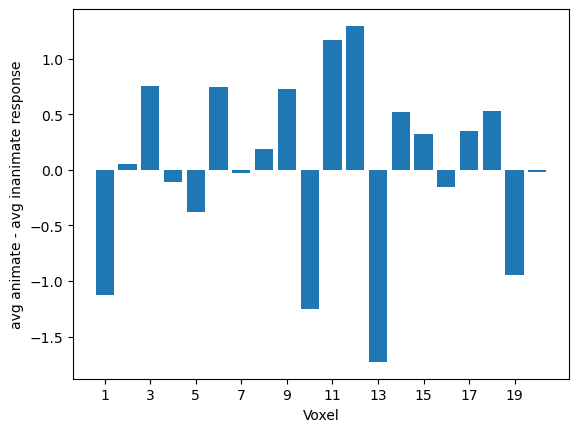

In [130]:
from matplotlib import pyplot as plt

plt.bar(range(1, 21), vox_avg_differences[:20])
plt.xlabel("Voxel")
plt.ylabel("avg animate - avg inanimate response")
plt.xticks(range(1,21, 2))
plt.show()

## SVM

We fit an SVM using voxcel responses.

Goal: use 100 voxcel response strenght to predict whether an image is animate or inanimate

In [180]:
# load data for subject 2

path_n_response_2 = './data/NeuralResponses_S2.txt'
n_response_2 = pd.read_csv(path_n_response_2)

anim_response_2 = n_response_2[animate_indices]
inanim_response_2 = n_response_2[inanimate_indices].reset_index(drop=True)

In [165]:
import numpy as np
X_train = np.concatenate((anim_response_2.values[:22], inanim_response_2.values[:22]), axis = 0)
y_train = np.array(([1]*22 + [-1]* 22)) # animates get label 1, inanimates get label -1
X_test = np.concatenate((anim_response_2.values[22:], inanim_response_2.values[22:]), axis = 0)
y_test = np.array(([1]*22 + [-1]* 22)) # animates get label 1, inanimates get label -1

In [173]:
X_train.shape # 22 animate and 22 inanimate voxcel response data

(44, 100)

In [177]:
y_train.shape # correct labels for training data

(44,)

In [178]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) #train classifier with training data
prediction = clf.predict(X_test) # make predictions on test data

In [179]:
prediction # this is the prediction

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,
        1, -1,  1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1,  1, -1, -1,  1])

In [192]:
from sklearn.metrics import classification_report

pd.DataFrame.from_dict(classification_report(y_test, prediction, output_dict=True)).transpose()


,precision,recall,f1-score,support
-1,0.695652,0.727273,0.711111,22.000000
1,0.714286,0.681818,0.697674,22.000000
accuracy,0.704545,0.704545,0.704545,0.704545
macro avg,0.704969,0.704545,0.704393,44.000000
weighted avg,0.704969,0.704545,0.704393,44.000000
